In [1]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd, locale, numpy as np
from matplotlib import ticker as mtick
from matplotlib.ticker import FormatStrFormatter

In [2]:
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
sns.set()
sns.set_style('whitegrid')
#plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams['font.family'] = 'Calibri'
plt.rc('font', size=14) 
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)

In [3]:
df = pd.read_excel('Gabriel Tkacz - P4-2.xlsx')
df.drop('Unnamed: 2', axis=1, inplace=True)
df.insert(2, 'Corrente (mA)', (1000 * df['Corrente (A)']))
df.insert(3, 'Potência (W)', (df['Voltagem (V)'] * df['Corrente (A)']))
df.insert(4, 'Potência (mW)', (1000 * df['Potência (W)']))
df

,Voltagem (V),Corrente (A),Corrente (mA),Potência (W),Potência (mW),Potencia Luminosa,Dimensão da placa
0,0.0,8.140000,8140.000000,0.000000,0.000000,1000 W/m2,2m x 1m
1,0.5,8.140000,8139.999985,4.070000,4069.999992,NaN,NaN
2,1.0,8.140000,8139.999967,8.140000,8139.999967,NaN,NaN
3,1.5,8.140000,8139.999945,12.210000,12209.999917,NaN,NaN
4,2.0,8.140000,8139.999918,16.280000,16279.999835,NaN,NaN
...,...,...,...,...,...,...,...
96,48.0,-0.810267,-810.267242,-38.892828,-38892.827638,NaN,NaN
97,48.5,-2.731293,-2731.292745,-132.467698,-132467.698120,NaN,NaN
98,49.0,-5.064634,-5064.634310,-248.167081,-248167.081188,NaN,NaN
99,49.5,-7.898789,-7898.788700,-390.990041,-390990.040630,NaN,NaN


In [4]:
Plight = df['Potencia Luminosa'].values[0]
Plight = int(Plight.split()[0])

dimensao = df['Dimensão da placa'].values[0]
Acell = int(dimensao[0]) * int(dimensao[-2])

a = df['Corrente (A)'].values
idx = min(range(len(a)), key=lambda i: abs(a[i]))

Isc = round(df['Corrente (A)'].values[0], 1)
Voc = round(df['Voltagem (V)'].values[idx], 1)

df_max = df.loc[df['Potência (W)'].idxmax()]
Pmax = round((df_max['Potência (W)']), 1)
Imp = round((df_max['Corrente (A)']), 1) 
Vmp = round((df_max['Voltagem (V)']), 1)

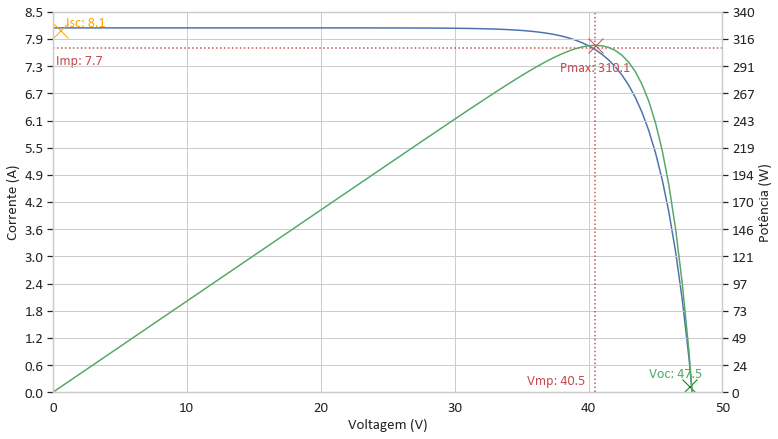

In [18]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df['Voltagem (V)'], df['Corrente (A)'])
ax2.plot(df['Voltagem (V)'], df['Potência (W)'], c='g')

ax1.plot(0.5, Isc, marker="x", markersize=15, markeredgecolor="orange")
ax1.annotate(f'Isc: {Isc}', (1, Isc), ha='left', va='bottom', c='orange')
ax1.plot(Voc, 0.15, marker="x", markersize=15, markeredgecolor="green")
ax1.annotate(f'Voc: {Voc}', (Voc-1, 0.4), ha='center', va='center', c='g')

ax2.plot(Vmp, Pmax, marker="x", markersize=15, markeredgecolor="r")
ax2.annotate(f'Pmax: {Pmax}', (Vmp, Pmax-20), ha='center', va='center', c='r')
ax1.axhline(y=Imp, color='r', linestyle=':')
ax1.annotate(f'Imp: {Imp}', (2, Imp-0.3), ha='center', va='center', c='r')
ax2.axvline(x=Vmp, color='r', linestyle=':')
ax2.annotate(f'Vmp: {Vmp}', (Vmp-0.75, 10), ha='right', va='center', c='r')

ax1.set_ylabel('Corrente (A)')
ax2.set_ylabel('Potência (W)')
ax1.set_xlabel('Voltagem (V)')
ax1.set_ylim([0, 8.5])
ax2.set_ylim([0, 340])
ax1.set_xlim([0, 50])
ax2.set_xlim([0, 50])
ax1.yaxis.set_major_locator(mtick.LinearLocator(15))
ax2.yaxis.set_major_locator(mtick.LinearLocator(15))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#ax1.autoscale(enable=True, axis='y')
#ax2.autoscale(enable=True, axis='y')
plt.show()

In [6]:
FF = round((Imp*Vmp)/(Isc*Voc) * 100, 1)
n = round((Pmax/Acell)/Plight * 100, 1)

In [7]:
print(f'Isc: {Isc}. O Isc ou "Short-Circuit Current" é')

print(f'Voc: {Voc}. O Voc ou "Open-Circuit Voltage" é')

print(f'Pmax: {Pmax}. O Pmax é a potência máxima atingida.')

print(f'Imp: {Imp}. O Imp é a corrente atingida em Pmax.')

print(f'Vmp: {Vmp}. O Vmp é a voltagem atingida em Pmax.')

print(f'FF: {FF}. O FF é')

print(f'Eficiência: {n}. A eficiência é quantos porcento d')

Isc: 8.1. O Isc ou "Short-Circuit Current" é
Voc: 47.5. O Voc ou "Open-Circuit Voltage" é
Pmax: 310.1. O Pmax é a potência máxima atingida.
Imp: 7.7. O Imp é a corrente atingida em Pmax.
Vmp: 40.5. O Vmp é a voltagem atingida em Pmax.
FF: 81.1. O FF é
Eficiência: 15.5. A eficiência é quantos porcento d
